In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
np.random.seed(seed = 100)
import seaborn as sns

In [2]:
df = pd.read_csv('2020set.csv', header = 'infer')

In [3]:
df.head

<bound method NDFrame.head of      Year  m   d   Time Time zone  Air temperature (degC)  Wind speed (m/s)
0    2020  1   1  00:00       UTC                    -1.1               3.9
1    2020  1   1  01:00       UTC                    -0.2               5.1
2    2020  1   1  02:00       UTC                     0.4               5.5
3    2020  1   1  03:00       UTC                     0.5               5.6
4    2020  1   1  04:00       UTC                    -0.1               5.0
..    ... ..  ..    ...       ...                     ...               ...
740  2020  1  31  20:00       UTC                     2.1               2.9
741  2020  1  31  21:00       UTC                     2.0               3.3
742  2020  1  31  22:00       UTC                     2.0               2.8
743  2020  1  31  23:00       UTC                     2.1               3.6
744  2020  2   1  00:00       UTC                     2.0               4.1

[745 rows x 7 columns]>

In [4]:
df = df.iloc[np.random.permutation(df.index)].reset_index(drop = True)

In [5]:
# Label = humidity, feature = pressure

In [6]:
X = df.iloc[:,5].values.reshape(-1,1)
y = df.iloc[:,6].values.reshape(-1,1)

In [7]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(X)
y = imp.fit_transform(y)

In [52]:
X_train,X_val,y_train,y_val = train_test_split(X, y, train_size = 0.6) 

In [95]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regr = LinearRegression()
regr.fit(X_poly, y_train)

LinearRegression()

In [96]:
#Printing the weights
print('w1: \n', regr.coef_)
print('w0: \n', regr.intercept_)

#training errors?
y_pred = regr.predict(poly_reg.fit_transform(X_train))
print('Training coefficcient of determination: %.2f' %r2_score(y_train, y_pred))

print('Training mean squared error: %.2f' % mean_squared_error(y_train, y_pred))


w1: 
 [[0.         0.50127503]]
w0: 
 [4.11320607]
Training coefficcient of determination: 0.36
Training mean squared error: 3.08


In [97]:
y_pred = regr.predict(poly_reg.fit_transform(X_val))

#mean squared error
print('Validation mean squared error: %.2f' % mean_squared_error(y_val, y_pred))
print('Validation coefficcient of determination: %.2f' %r2_score(y_val, y_pred))

Validation mean squared error: 2.93
Validation coefficcient of determination: 0.37


In [90]:
bf = pd.read_csv('TestSet.csv', header = 'infer')

In [91]:
bf = bf.iloc[np.random.permutation(df.index)].reset_index(drop = True)

In [92]:
TX = bf.iloc[:,5].values.reshape(-1,1)
Ty = bf.iloc[:,6].values.reshape(-1,1)

In [93]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
TX = imp.fit_transform(TX)
Ty = imp.fit_transform(Ty)

In [94]:
y_pred = regr.predict(poly_reg.fit_transform(TX))

#mean squared error
print('Validation mean squared error: %.2f' % mean_squared_error(Ty, y_pred))
print('Validation coefficcient of determination: %.2f' %r2_score(Ty, y_pred))

Validation mean squared error: 4.50
Validation coefficcient of determination: -0.50


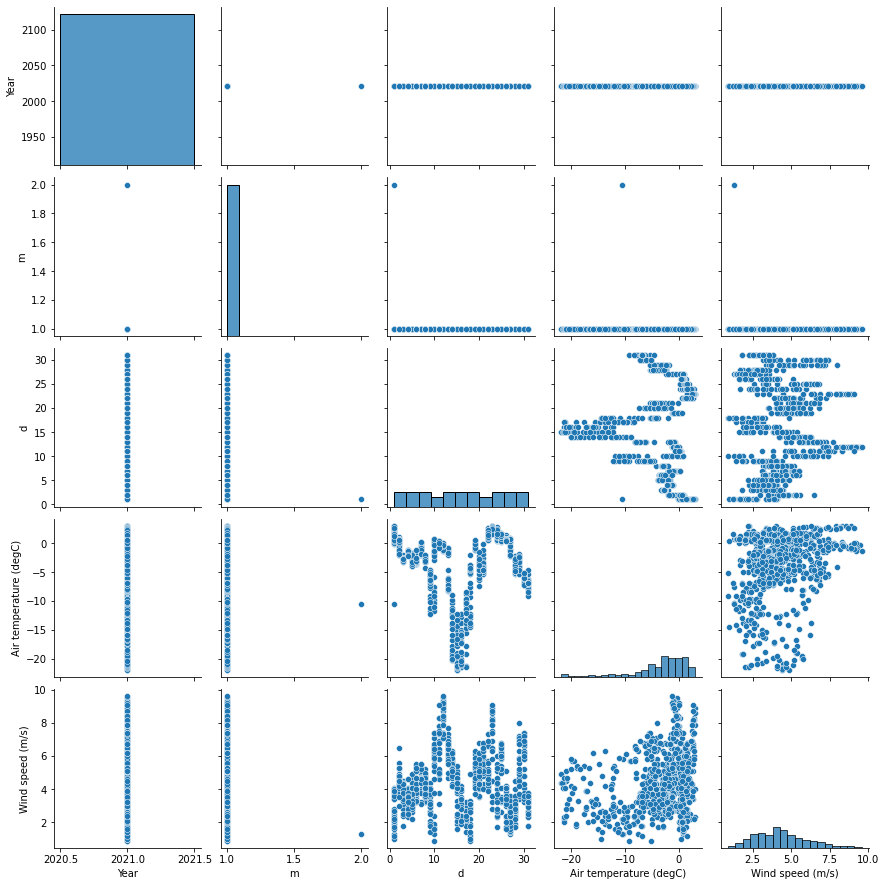

In [42]:
sns.pairplot(bf)